In [83]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import random


In [5]:

# Load the pickle file containing the dataset
with open('data/pascal_metrics.pkl', 'rb') as f:
    data = pickle.load(f)

# Convert the dataset to a Pandas DataFrame
df = pd.DataFrame(data)

# Display the first 5 rows of the dataset
df.head()

,lc,uc,dm,sp
0,0.000036,-0.019129,19,7.938295
1,0.000038,-0.017782,18,7.635022
2,0.000070,-0.033328,17,7.192027
3,0.000015,-0.020601,18,7.369569
4,0.000052,-0.034103,18,7.439218


In [58]:
window_size=100

# Extract the values for each metric
cheeger_lower_bound = [graph['lc'] for graph in data]
cheeger_upper_bound = [graph['uc'] for graph in data]
cheeger_median = [
    (graph['lc'] + graph['uc']) / 2
     for graph in data]
shortest_path = [graph['dm'] for graph in data]
graph_diameter = [graph['sp'] for graph in data]

# Normalize the Cheeger lower bound
# scaler_cheeger_lower_bound = MinMaxScaler()
# cheeger_lower_bound_norm = scaler_cheeger_lower_bound.fit_transform(np.array(cheeger_lower_bound).reshape(-1, 1))

# Normalize the Cheeger upper bound
scaler_cheeger_median = MinMaxScaler()
cheeger_median_norm = scaler_cheeger_median.fit_transform(np.array(cheeger_median).reshape(-1, 1))

# Normalize the shortest path
scaler_shortest_path = MinMaxScaler()
shortest_path_norm = scaler_shortest_path.fit_transform(np.array(shortest_path).reshape(-1, 1))

# Normalize the graph diameter
scaler_graph_diameter = MinMaxScaler()
graph_diameter_norm = scaler_graph_diameter.fit_transform(np.array(graph_diameter).reshape(-1, 1))


# Apply a moving average to each metric
# cheeger_lower_bound_smooth = np.convolve(cheeger_lower_bound, np.ones(window_size) / window_size, mode='valid')
# cheeger_upper_bound_smooth = np.convolve(cheeger_upper_bound, np.ones(window_size) / window_size, mode='valid')
cheeger_median_smooth = np.convolve(cheeger_median, np.ones(window_size) / window_size, mode='valid')
shortest_path_smooth = np.convolve(shortest_path, np.ones(window_size) / window_size, mode='valid')
graph_diameter_smooth = np.convolve(graph_diameter, np.ones(window_size) / window_size, mode='valid')


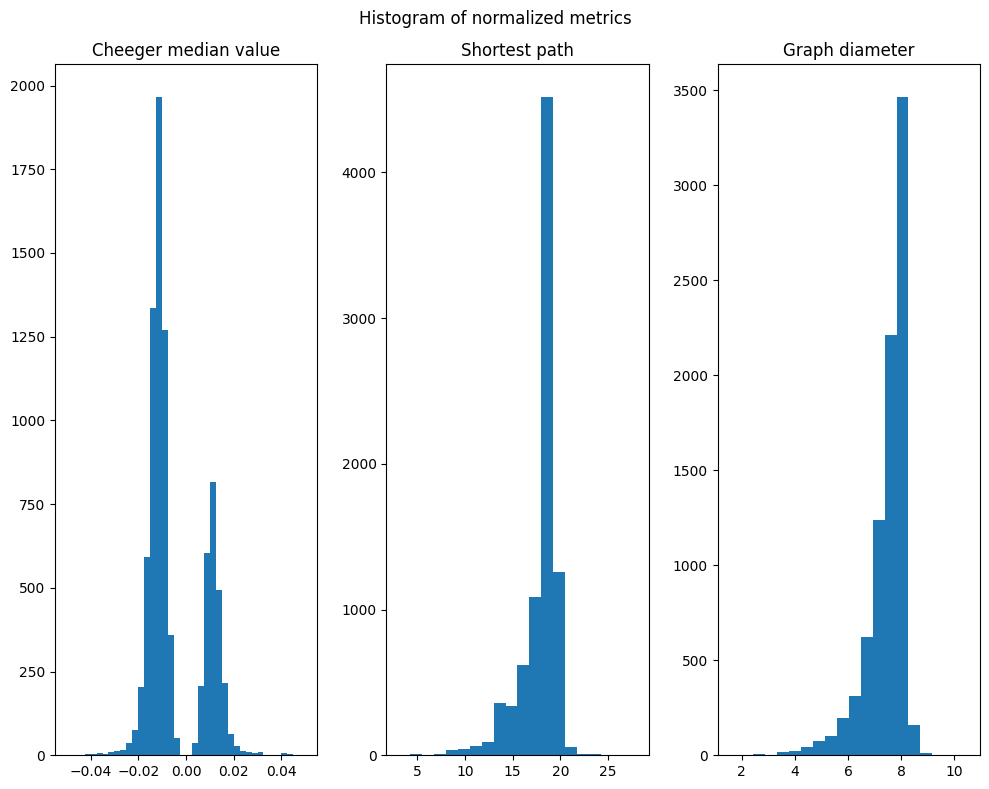

In [128]:
 # Plot a histogram for each metric
fig, axs = plt.subplots(1, 3, figsize=(10, 8))

axs[0].hist(cheeger_median, bins=40, range=(-0.05, 0.05))
axs[0].set_title('Cheeger median value')

# axs[0, 1].hist(cheeger_upper_bound_norm, bins=20)
# axs[0, 1].set_title('Cheeger upper bound')

axs[1].hist(shortest_path, bins=20)
axs[1].set_title('Shortest path')

axs[2].hist(graph_diameter, bins=20)
axs[2].set_title('Graph diameter')

# Set the overall title for the plot
fig.suptitle('Histogram of normalized metrics')

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


First, we present the distribution of the graphs in the pascal dataset over the different metrices. As can be observed, the graphs with different path lengths and amount of bottleneck (represented by the Cheeger value) range and there is a high representation of graphs with values that we consider as long range. We cannot be certain that the Cheeger values presented here represent a high bottlenecl. I.e., whether we expect these graphs to represent an oversquashing problem.


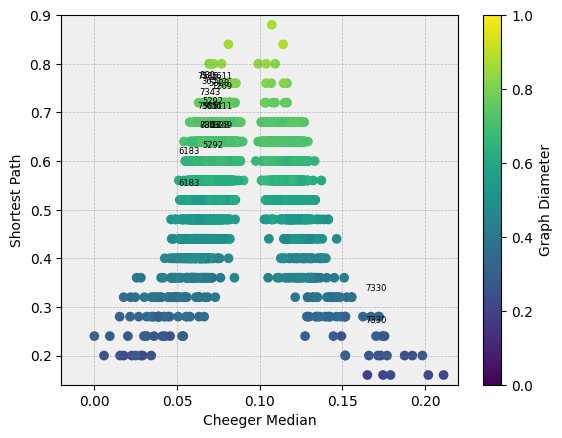

In [110]:
# Generate a list of 10 random indices from the first 3000 graphs
random_indices = random.sample(range(8000), 10)

# Set the limits for each metric
cheeger_median_limit = (-0.02, 0.22)
shortest_path_limit = (0.14, 0.9)
graph_diameter_limit = (0, 1)

# Create the plot
fig, ax = plt.subplots()
ax.scatter(cheeger_median_norm, shortest_path_norm, c=graph_diameter_norm, cmap='viridis')
ax.set_xlabel('Cheeger Median')
ax.set_ylabel('Shortest Path')
ax.set_xlim(cheeger_median_limit)
ax.set_ylim(shortest_path_limit)
ax.set_facecolor('#f0f0f0')
ax.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

# Add a colorbar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=0, vmax=1))
sm._A = []
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Graph Diameter')

# Add the index labels
for i in random_indices:
    plt.annotate(str(i), (cheeger_median_norm[i], shortest_path_norm[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=6)
    plt.annotate(str(i), (cheeger_median_norm[i], graph_diameter_norm[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=6)
# ax.set_xticklabels([f'{i:.0f}' for i in ax.get_xticks()], fontsize=2)
plt.show()

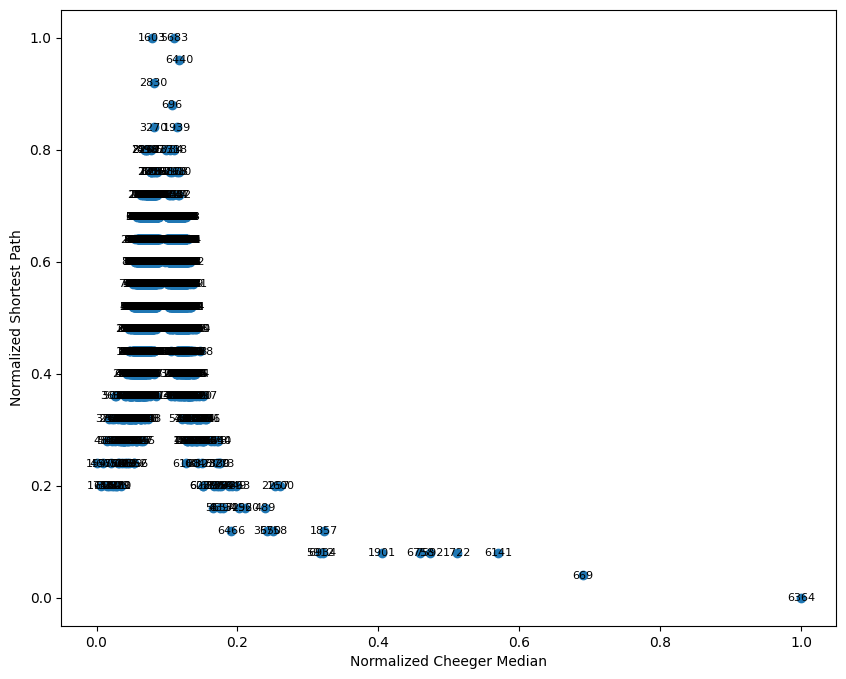

In [120]:
# Plot the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(cheeger_median_norm, shortest_path_norm)

# Add the index of cheeger_median_norm to all points
for i, (x, y) in enumerate(zip(cheeger_median_norm, shortest_path_norm)):
    plt.text(x, y, i, fontsize=8, ha='center', va='center')

# Set the x and y labels
plt.xlabel('Normalized Cheeger Median')
plt.ylabel('Normalized Shortest Path')

# Show the plot
plt.show()